In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

%matplotlib inline 

#sets max columns so I can everything
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [2]:
#load data

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train['DataType'] = 'Train'
df_test['DataType'] = 'Test'

df_train.drop(labels = 'Id',inplace = True, axis = 1)
df_test.drop(labels = 'Id',inplace = True, axis = 1)

In [4]:
df_master = pd.concat([df_train,df_test])

In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
dfCheatSheet = pd.read_csv('DataCheatSheet.csv')

In [7]:
dfDesciptOnly = pd.read_csv('data_descriptions_only.csv',header =0)

In [8]:
dfCheatSheet.head()

,Variable,Count,Type
0,MSSubClass,1460,int64
1,MSZoning,1460,object
2,LotFrontage,1201,float64
3,LotArea,1460,int64
4,Street,1460,object


In [9]:
#code for splitting columns into new columns
#df['A'], df['B'] = df['AB'].str.split(' ', 1).str
#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns 
dfDesciptOnly['Variable'],dfDesciptOnly['Description'] = dfDesciptOnly['Description'].str.split(':').str

In [10]:
dfDesciptOnly.head()

,Description,Variable
0,Identifies the type of dwelling involved in the sale.,MSSubClass
1,Identifies the general zoning classification of the sale.,MSZoning
2,Linear feet of street connected to property,LotFrontage
3,Lot size in square feet,LotArea
4,Type of road access to property,Street


In [11]:
dfCheatSheet.head()

,Variable,Count,Type
0,MSSubClass,1460,int64
1,MSZoning,1460,object
2,LotFrontage,1201,float64
3,LotArea,1460,int64
4,Street,1460,object


In [12]:
#pd.merge(df_new, df_n, on='subject_id')
dfCheatFinal = pd.merge(dfCheatSheet,dfDesciptOnly, on = 'Variable')

In [13]:
dfCheatFinal
#need to figure out how to make the description longer or wrap arround

,Variable,Count,Type,Description
0,MSSubClass,1460,int64,Identifies the type of dwelling involved in the sale.
1,MSZoning,1460,object,Identifies the general zoning classification of the sale.
2,LotFrontage,1201,float64,Linear feet of street connected to property
3,LotArea,1460,int64,Lot size in square feet
4,Street,1460,object,Type of road access to property
5,Alley,91,object,Type of alley access to property
6,LotShape,1460,object,General shape of property
7,LandContour,1460,object,Flatness of the property
8,Utilities,1460,object,Type of utilities available
9,LotConfig,1460,object,Lot configuration


In [14]:
#Data Cleaning

#identify & drop where missing half of the data

#length of data set
threshold = len(df_train)/2
#print(threshold)

#like indexing the data frame
#can index the df.columns based on boolean value
columnsToDrop = df_train.columns[(df_train.count()<threshold)]
df_master.drop(labels = columnsToDrop,inplace = True, axis = 1)

In [15]:
#implement data cleaning changes
df_train = df_master[df_master['DataType']=='Train']
df_test = df_master[df_master['DataType']=='Test']

In [16]:
#df_train.isnull() # returns a df w/ boolean values indicating if false

#sums up all NAs 
#df_train.isnull().sum()

#probably could condense this to only return the columns where it is greater than 5%


#returns only the colums where NA is greater than zero
NaColumns = df_train.columns[df_train.isnull().sum() > 0]

#df_train.BsmtCond

In [17]:
df_train[NaColumns].isnull().sum()

#https://www.dataquest.io/blog/machine-learning-preparing-data/
#recommended to remove any columns where 1% of the row or more is missing 
#why 1%?  What if it was 10%?  Let's try 5% given that feels right

BsmtCond        37 
BsmtExposure    38 
BsmtFinType1    37 
BsmtFinType2    38 
BsmtQual        37 
Electrical      1  
FireplaceQu     690
GarageCond      81 
GarageFinish    81 
GarageQual      81 
GarageType      81 
GarageYrBlt     81 
LotFrontage     259
MasVnrArea      8  
MasVnrType      8  
dtype: int64

In [18]:
# different % of data
print(len(df_train)*.01)
print(len(df_train)*.05)
print(len(df_train)*.1)

14.6
73.0
146.0


In [19]:
MissingDataCutOff = len(df_train)*.05

In [20]:
#Need to break this out into more steps, its a litle complicated right now
MoreDropColumns = df_train[NaColumns].columns[df_train[NaColumns].isnull().sum() > MissingDataCutOff]
#df_train[NaColumns].columns.isna

In [21]:
df_master.drop(labels = MoreDropColumns,inplace = True, axis = 1)

In [22]:
#implement data cleaning changes
df_train = df_master[df_master['DataType']=='Train']
df_test = df_master[df_master['DataType']=='Test']

In [23]:
df_train.columns[df_train.isnull().sum()>0]

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [24]:
dfCheatFinal[dfCheatFinal['Variable'] == 'BsmtCond']

,Variable,Count,Type,Description
30,BsmtCond,1423,object,Evaluates the general condition of the basement


In [25]:
#Exploring & Removing Null Values

In [26]:
#Data Engineering
df_master['TotFullBath'] = (df_master['BsmtFullBath'] + df_master['FullBath'])
df_master['TotHalfBath'] = (df_master['BsmtHalfBath'] + df_master['HalfBath'])
df_master['YrSinceRemod'] = (2011 - df_master['YearRemodAdd'])
df_master['HouseAge'] = (2011 -df_master['YearBuilt'])
df_master['TotSF'] = (df_master['1stFlrSF'] + df_master['2ndFlrSF'])

In [27]:
basic_variables = ['LotArea','HouseAge','YrSinceRemod','TotSF','BedroomAbvGr','TotRmsAbvGrd','SalePrice']

In [28]:
#implement data changes engineering 

df_train = df_master[df_master['DataType']=='Train']
df_test = df_master[df_master['DataType']=='Test']

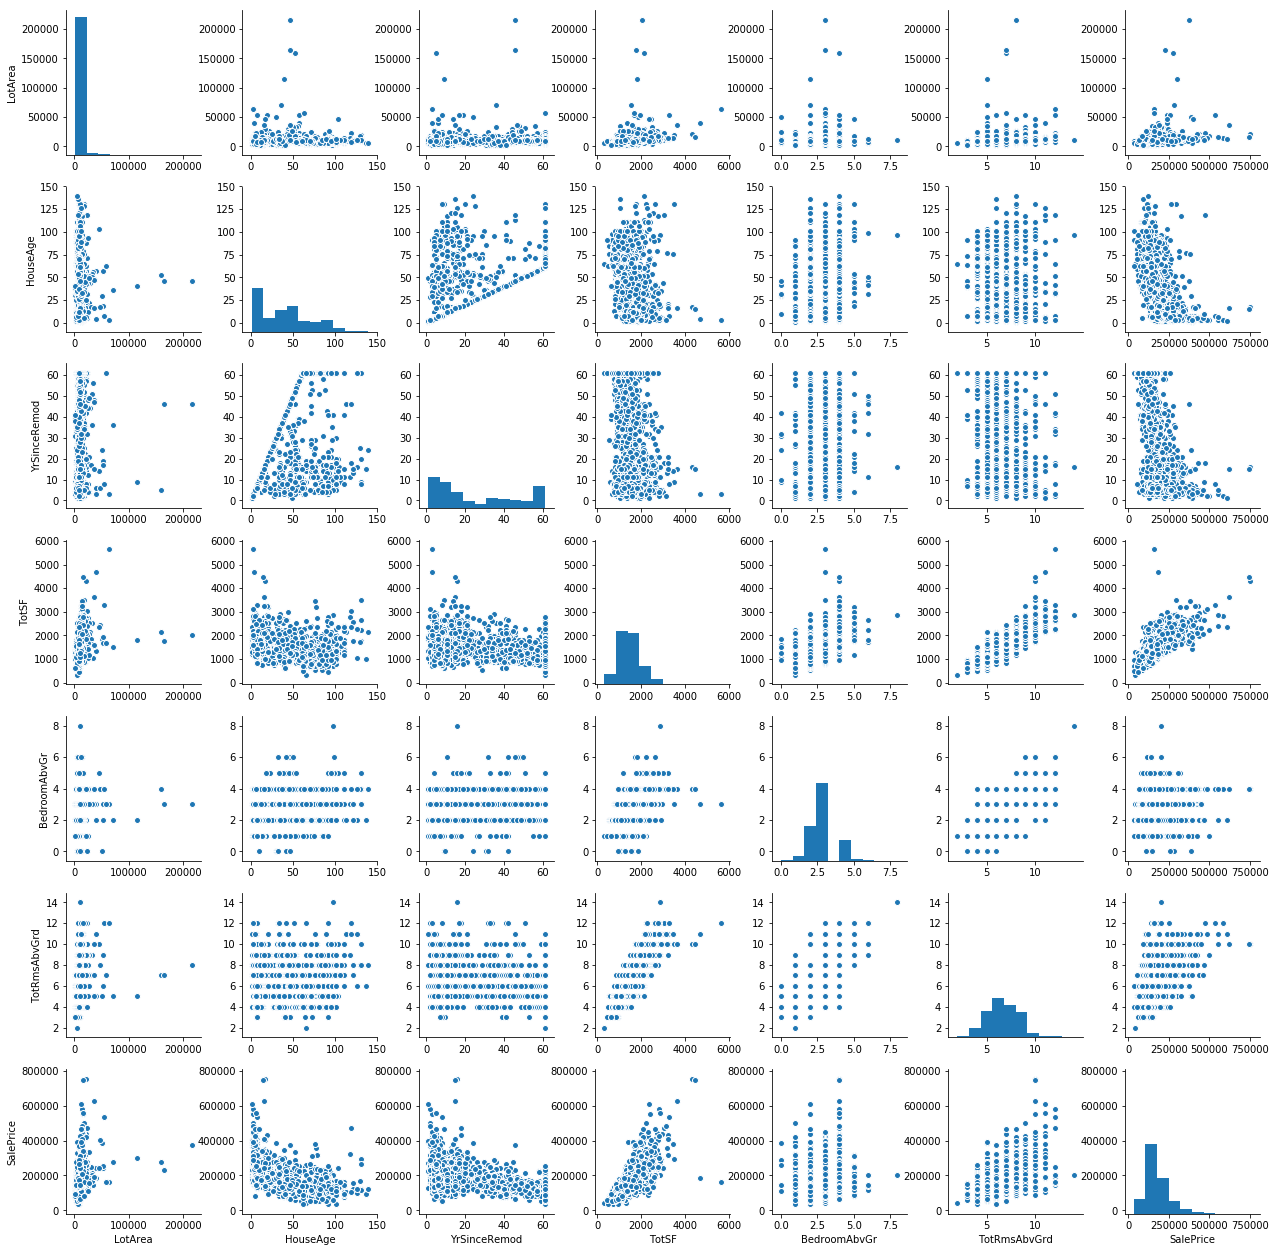

In [29]:
sns.pairplot(df_train[basic_variables])

In [30]:
df_train[['BedroomAbvGr','SalePrice']].corr()

,BedroomAbvGr,SalePrice
BedroomAbvGr,1.000000,0.168213
SalePrice,0.168213,1.000000


In [31]:
df_train[['TotRmsAbvGrd','SalePrice']].corr()

,TotRmsAbvGrd,SalePrice
TotRmsAbvGrd,1.000000,0.533723
SalePrice,0.533723,1.000000


In [32]:
df_basic = df_train[basic_variables]
df_basic_test = df_test[basic_variables]

In [33]:
#Machine Learning Classification
x_train = df_basic.drop(labels = 'SalePrice',axis=1)
y_train = df_basic.SalePrice

x_test = df_basic_test.drop(labels = 'SalePrice',axis=1)

In [34]:
#Machine Learning
y = y_train

In [35]:
clf_tree = DecisionTreeClassifier()

In [36]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
test = clf_tree.predict(x_train)

In [43]:
acc = mean_squared_error(test,y_train)

In [44]:
print(acc)

421040.30137


In [37]:
pred_tree = clf_tree.predict(x_test)

In [38]:
print(pred_tree)

[ 144000.  137500.  224900. ...,  135000.   93500.  240000.]


In [46]:
clf_reg = linear_model.LinearRegression()
clf_reg.fit(x_train,y_train)
pred_reg = clf_reg.predict(x_test)

In [47]:
test2 = clf_reg.predict(x_train)

In [48]:
acc2 = mean_squared_error(test2,y_train)

In [49]:
print(acc2)

1893497617.18


In [ ]:
print(pred_reg)

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
test_ids = df_test.Id

#submission_reg = {'Id':test_ids,'SalePrice':pred_reg}
sub_tree1 = {'Id':test_ids,'SalePrice':pred_tree}

#sub_reg = pd.DataFrame(submission_reg)
sub_tree = pd.DataFrame(sub_tree1)

In [ ]:
#sub_reg.to_csv("Regression.csv",index = False)
sub_tree.to_csv("Tree.csv",index = False)

In [ ]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6